In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Producing the Tables

In [46]:
# with open('saved/weno3.pkl', 'rb') as foo:
with open('tables/5_1_1.pkl', 'rb') as foo:
    data = pickle.load(foo)

# [errors,L1s,orders_1,Linfs,orders_inf,iters,N]

data[1] = [f"{num:.3e}" for num in data[1]]
data[3] = [f"{num:.3e}" for num in data[3]]
data[5] = [int(num) for num in data[5]]
# data[5] = [f"{num:.}" for num in data[1]]

df = pd.DataFrame({
    'N': data[6] - 1,
    'L_1 Error': data[1],
    'L_1 Order': data[2],
    'L_inf Error': data[3],
    'L_inf Order': data[4],
    'Iterations': data[5]
})

print(df)

      N  L_1 Error  L_1 Order L_inf Error  L_inf Order  Iterations
0    40  1.009e-03        NaN   3.171e-03          NaN          81
1    80  1.503e-04   2.746754   6.168e-04     2.362200         209
2   160  1.961e-05   2.938453   1.201e-04     2.360192         505
3   320  2.222e-06   3.141978   2.451e-05     2.293147        1154
4   640  2.419e-07   3.199434   4.894e-06     2.324276        2582
5  1280  2.510e-08   3.268100   9.391e-07     2.381678        5718
6  2560  2.410e-09   3.380740   1.616e-07     2.538457       12622


# Plotting the Errors

In [17]:
with open('plotting/5_1_1_beta_2.pkl', 'rb') as foot:
    data = pickle.load(foot)

In [18]:
sols = data[0]
xs = data[1]
approxs = data[2]
conditions = data[3]


In [31]:
# conditions['161']
xs['81'][2] - xs['81'][1]
# xs['81'][1] - xs['81'][0]

0.039269908169872414

## Plotting the Convergence Conditions

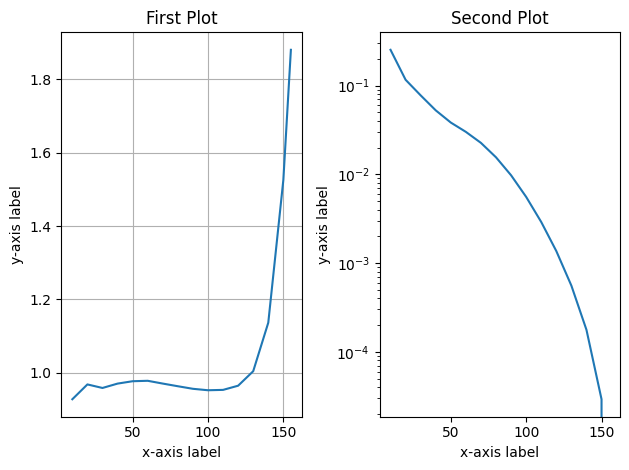

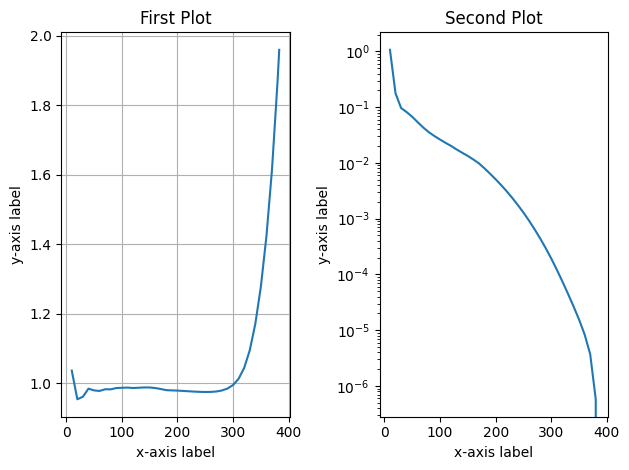

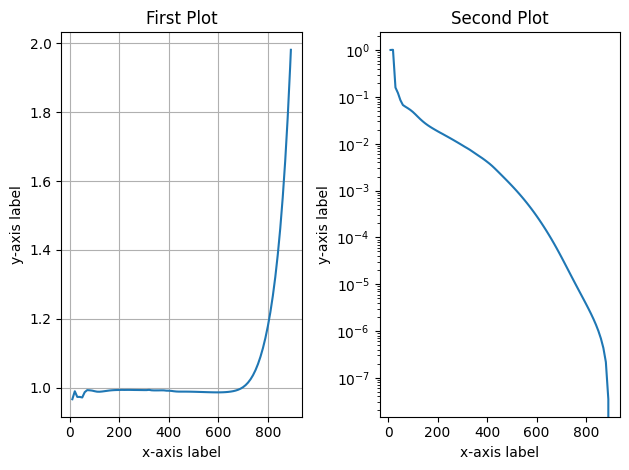

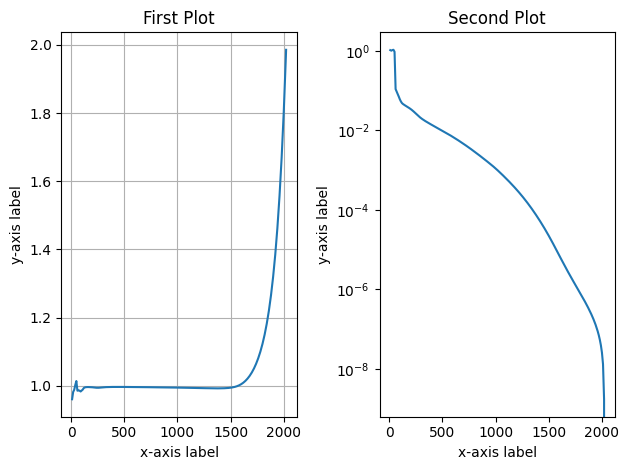

In [27]:
# get the keys from the list of convergence conditions to iterate through
N_keys = list(conditions.keys()) # make an iterable of the major keys (number of points)
iter_keys = []
for N_key in N_keys:
    iter_keys.append(list(conditions[N_key].keys())) # make an iterable of the minor keys (iteration number)
dx = xs[1] - xs[0]
inc = 0
for key_list in iter_keys:
    q1 = []
    q2 = []
    x = []
    N_key = N_keys[inc]
    inc2 = 0
    for key in key_list:
        q1.append(conditions[N_key][key][0])
        q2.append(conditions[N_key][key][1] + dx**4)
        x.append(int(key))
        inc2 += 1

    fig, (ax1, ax2) = plt.subplots(1,2)
    # Plotting on the first subplot
    ax1.plot(x, q1)  # Replace x1, y1 with your data for the first plot
    ax1.grid(True)
    ax1.set_title('First Plot')
    ax1.set_xlabel('x-axis label')
    ax1.set_ylabel('y-axis label')

    # Plotting on the second subplot
    ax2.plot(x, q2)  # Replace x2, y2 with your data for the second plot
    ax2.set_title('Second Plot')
    ax2.set_xlabel('x-axis label')
    plt.yscale('log')
    ax2.set_ylabel('y-axis label')

    # Adjust the layout
    plt.tight_layout()
    plt.show()
    plt.close()
    inc += 1

## Plotting the Convergence of the L1 Error

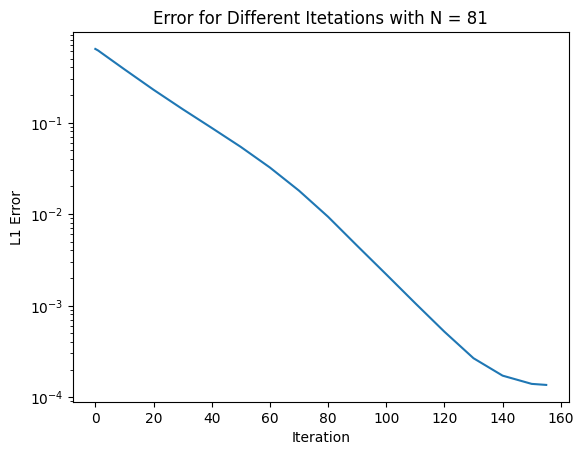

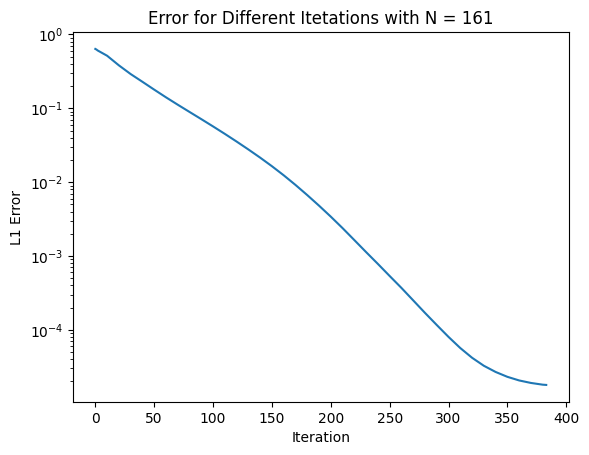

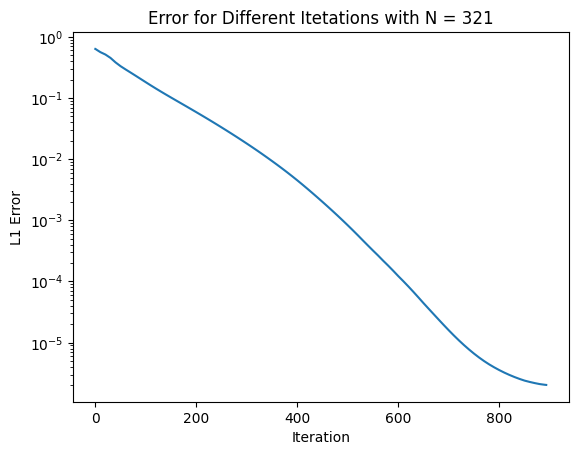

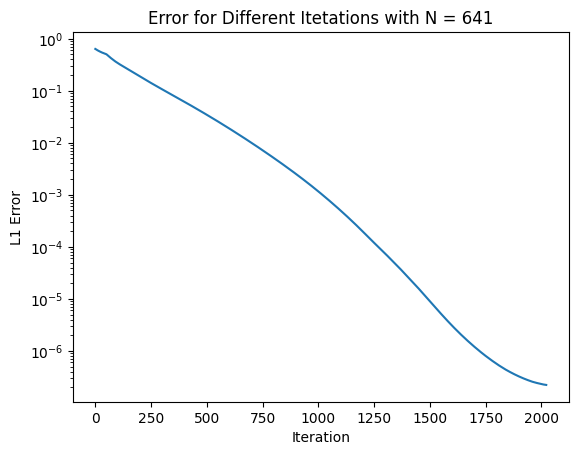

In [32]:
# get the keys from the list of approximations to iterate through
N_keys = list(approxs.keys())
iter_keys = []
for N_key in N_keys:
    iter_keys.append(list(approxs[N_key].keys()))

inc = 0
for key_list in iter_keys:
    L1_errors = []
    x = []
    N_key = N_keys[inc]
    inc2 = 0
    for key in key_list:
        L1_error = np.mean(np.abs(approxs[N_key][key] - sols[N_key]))
        L1_errors.append(L1_error)
        x.append(int(key))
        inc2 += 1
    plt.plot(x,L1_errors)
    # plt.legend(bbox_to_anchor=(1,0.5), loc='center left',fontsize=10)
    plt.title(f'Error for Different Itetations with N = {N_keys[inc]}')
    plt.yscale('log')
    plt.ylabel('L1 Error')
    plt.xlabel('Iteration')
    # plt.savefig(f'C:/Users/damie/OneDrive/UW/research/jingwei/reports/12_23/12_11_23/imgs/L1_{N_keys[inc]}.png', bbox_inches='tight')
    plt.show()
    plt.close()
    inc += 1

## Plotting the Entire Error Function

In [42]:
inc = 0
for key_list in iter_keys:
    N_key = N_keys[inc]
    for key in key_list[:5]:
        plt.plot(xs[N_key],np.abs(approxs[N_key][key] - sols[N_key]),'--',label=f'Iteration {key}')
    for key in key_list[-3:]:
        plt.plot(xs[N_key],np.abs(approxs[N_key][key] - sols[N_key]),'--',label=f'Iteration {key}')
    plt.legend(bbox_to_anchor=(1,0.5), loc='center left',fontsize=10)
    plt.title(f'Error for Different Itetations with N = {N_keys[inc]}')
    plt.yscale('log')
    plt.ylabel('|Solution - Approximation|')
    plt.xlabel('x')
    plt.savefig(f'C:/Users/damie/OneDrive/UW/research/jingwei/reports/12_23/12_11_23/imgs/difference_{N_keys[inc]}.png', bbox_inches='tight')
    # plt.show()
    plt.close()
    inc += 1